In [1]:
!pip install kagglehub

# IMPORT LIBRARY

In [165]:
import kagglehub
import os
import shutil

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [12]:
path = kagglehub.dataset_download("architsharma01/loan-approval-prediction-dataset")

print("Konten direktori utama:")
print(os.listdir(path))
for root, dirs, _ in os.walk(path):
    print(root)

Konten direktori utama:
['loan_approval_dataset.csv']
/kaggle/input/loan-approval-prediction-dataset


In [147]:
df = pd.read_csv(f"{path}/loan_approval_dataset.csv")
df.columns = df.columns.str.strip()
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# EDA

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_id,4269.0,2.135000e+03,1.232498e+03,1.0,1068.0,2135.0,3202.0,4269.0
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0


In [146]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
education,4269.0,4.977747e-01,5.000536e-01,0.0,0.0,0.0,1.0,1.0
self_employed,4269.0,5.036308e-01,5.000454e-01,0.0,0.0,1.0,1.0,1.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0


In [102]:
data = df.copy()
data = data.drop(columns='loan_id')
num_col = data.select_dtypes(include=['int64']).columns
cat_col = data.select_dtypes(include='object').columns

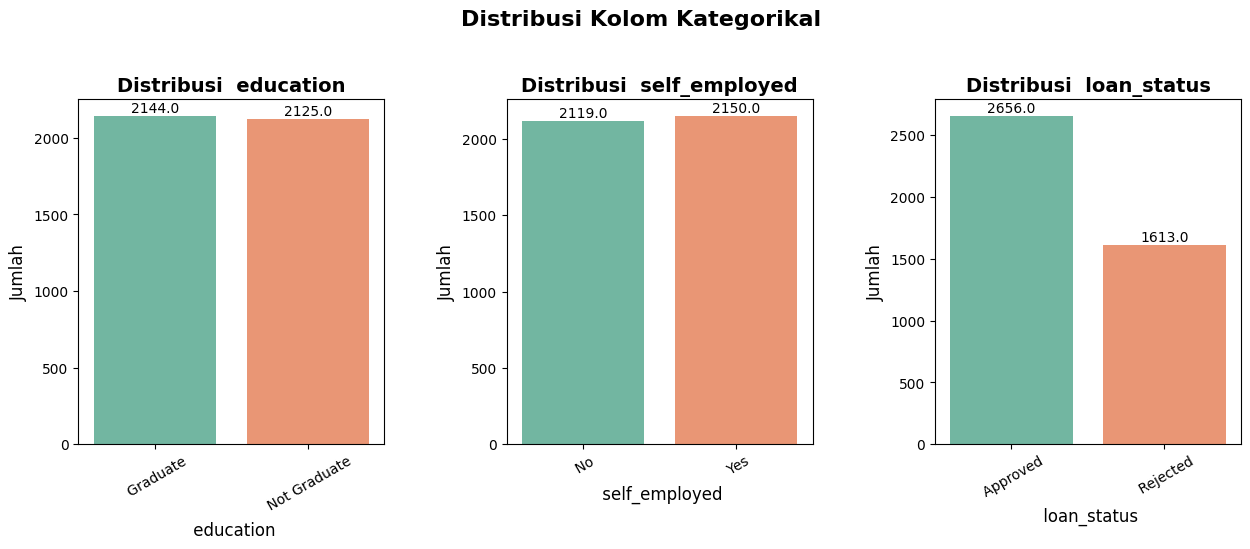

In [88]:
# Pilih palet warna
palette = sns.color_palette("Set2")

# Tentukan jumlah subplot berdasarkan jumlah kolom kategorikal
n_col = len(cat_col)
n_rows = (n_col + 2) // 2  # 2 kolom per baris
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs = axs.flatten()

# Loop untuk membuat countplot
for i, kolom in enumerate(cat_col):
    ax = axs[i]
    sns.countplot(data=df, x=kolom, palette=palette, ax=ax)
    ax.set_title(f"Distribusi {kolom}", fontsize=14, fontweight='bold')
    ax.set_xlabel(kolom, fontsize=12)
    ax.set_ylabel("Jumlah", fontsize=12)
    ax.tick_params(axis='x', rotation=30)

    # Tambahkan label di atas setiap bar
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, color='black')

# Sembunyikan subplot yang tidak terpakai
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.suptitle("Distribusi Kolom Kategorikal", fontsize=16, fontweight='bold')
plt.subplots_adjust(wspace=0.4, top=0.8)  # atur jarak horizontal dan ruang atas
plt.show()


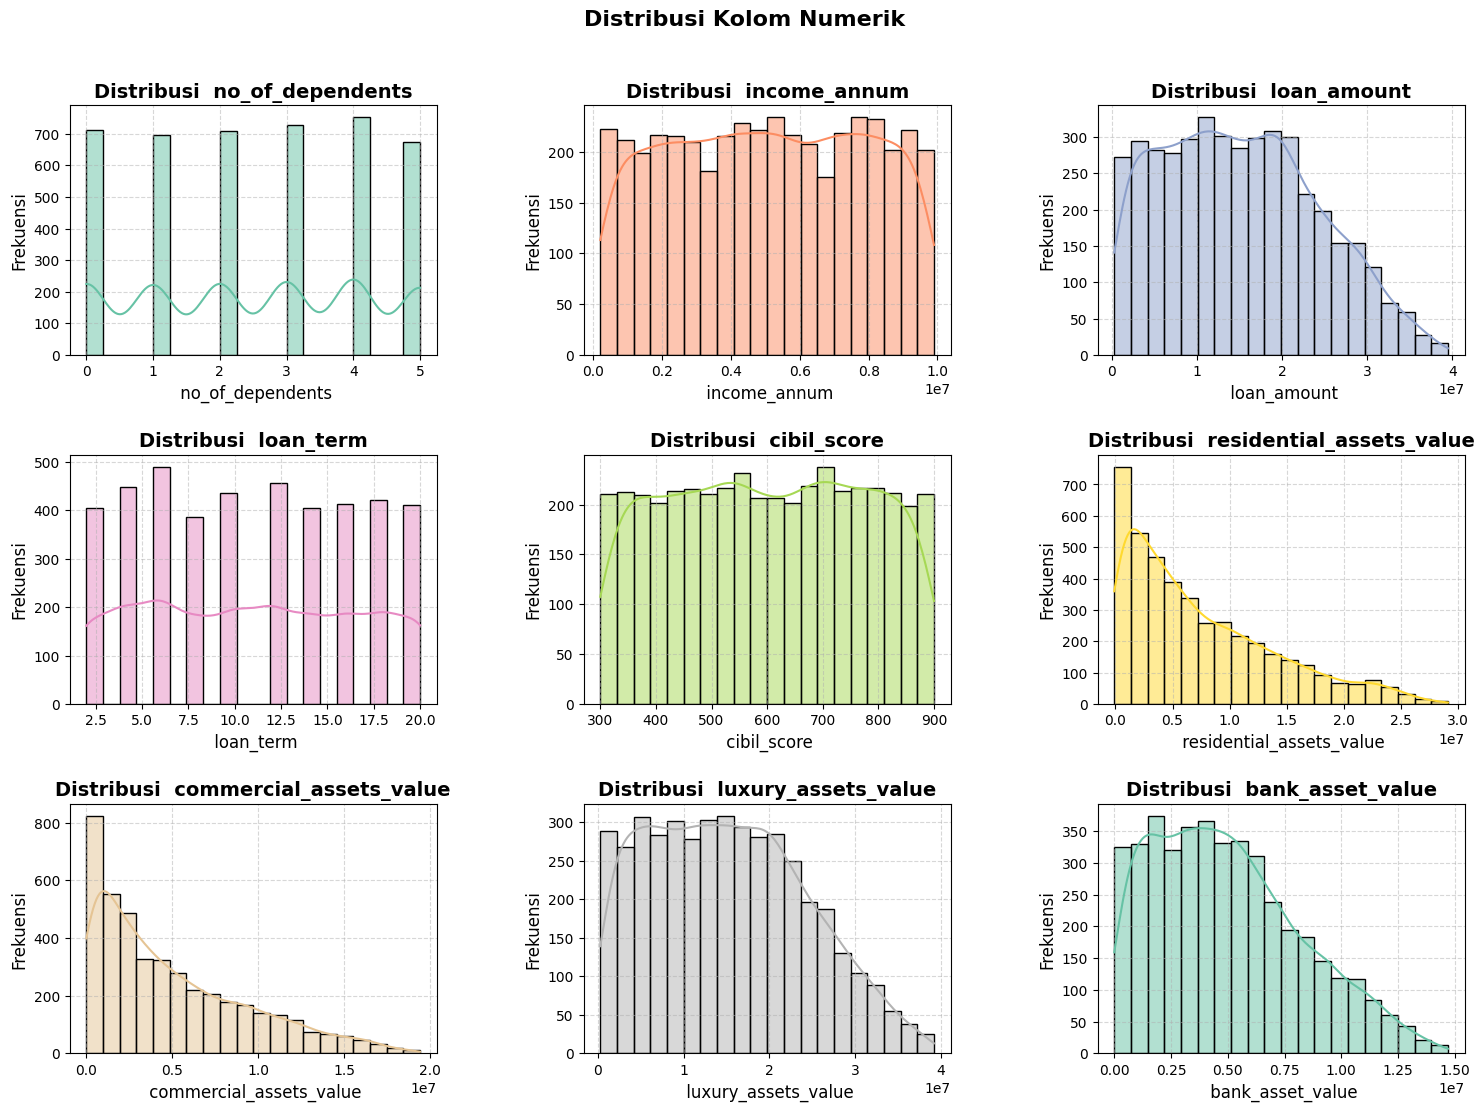

In [87]:
# Palet warna (tidak begitu berpengaruh untuk histogram, tapi tetap bisa digunakan)
palette = sns.color_palette("Set2")

# Ganti cat_col dengan num_col
n_col = len(num_col)
n_cols = 3  # jumlah kolom subplot per baris
n_rows = (n_col + n_cols - 1) // n_cols

# Buat subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))
axs = axs.flatten()

# Loop untuk membuat histogram
for i, kolom in enumerate(num_col):
    ax = axs[i]
    sns.histplot(data=df, x=kolom, bins=20, kde=True, color=palette[i % len(palette)], ax=ax)
    ax.set_title(f"Distribusi {kolom}", fontsize=14, fontweight='bold')
    ax.set_xlabel(kolom, fontsize=12)
    ax.set_ylabel("Frekuensi", fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.5)

# Sembunyikan subplot kosong (jika jumlah kolom numerik tidak habis dibagi n_cols)
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.suptitle("Distribusi Kolom Numerik", fontsize=20, fontweight='bold')
plt.subplots_adjust(wspace=0.4, hspace=0.4, top=0.9)
plt.show()


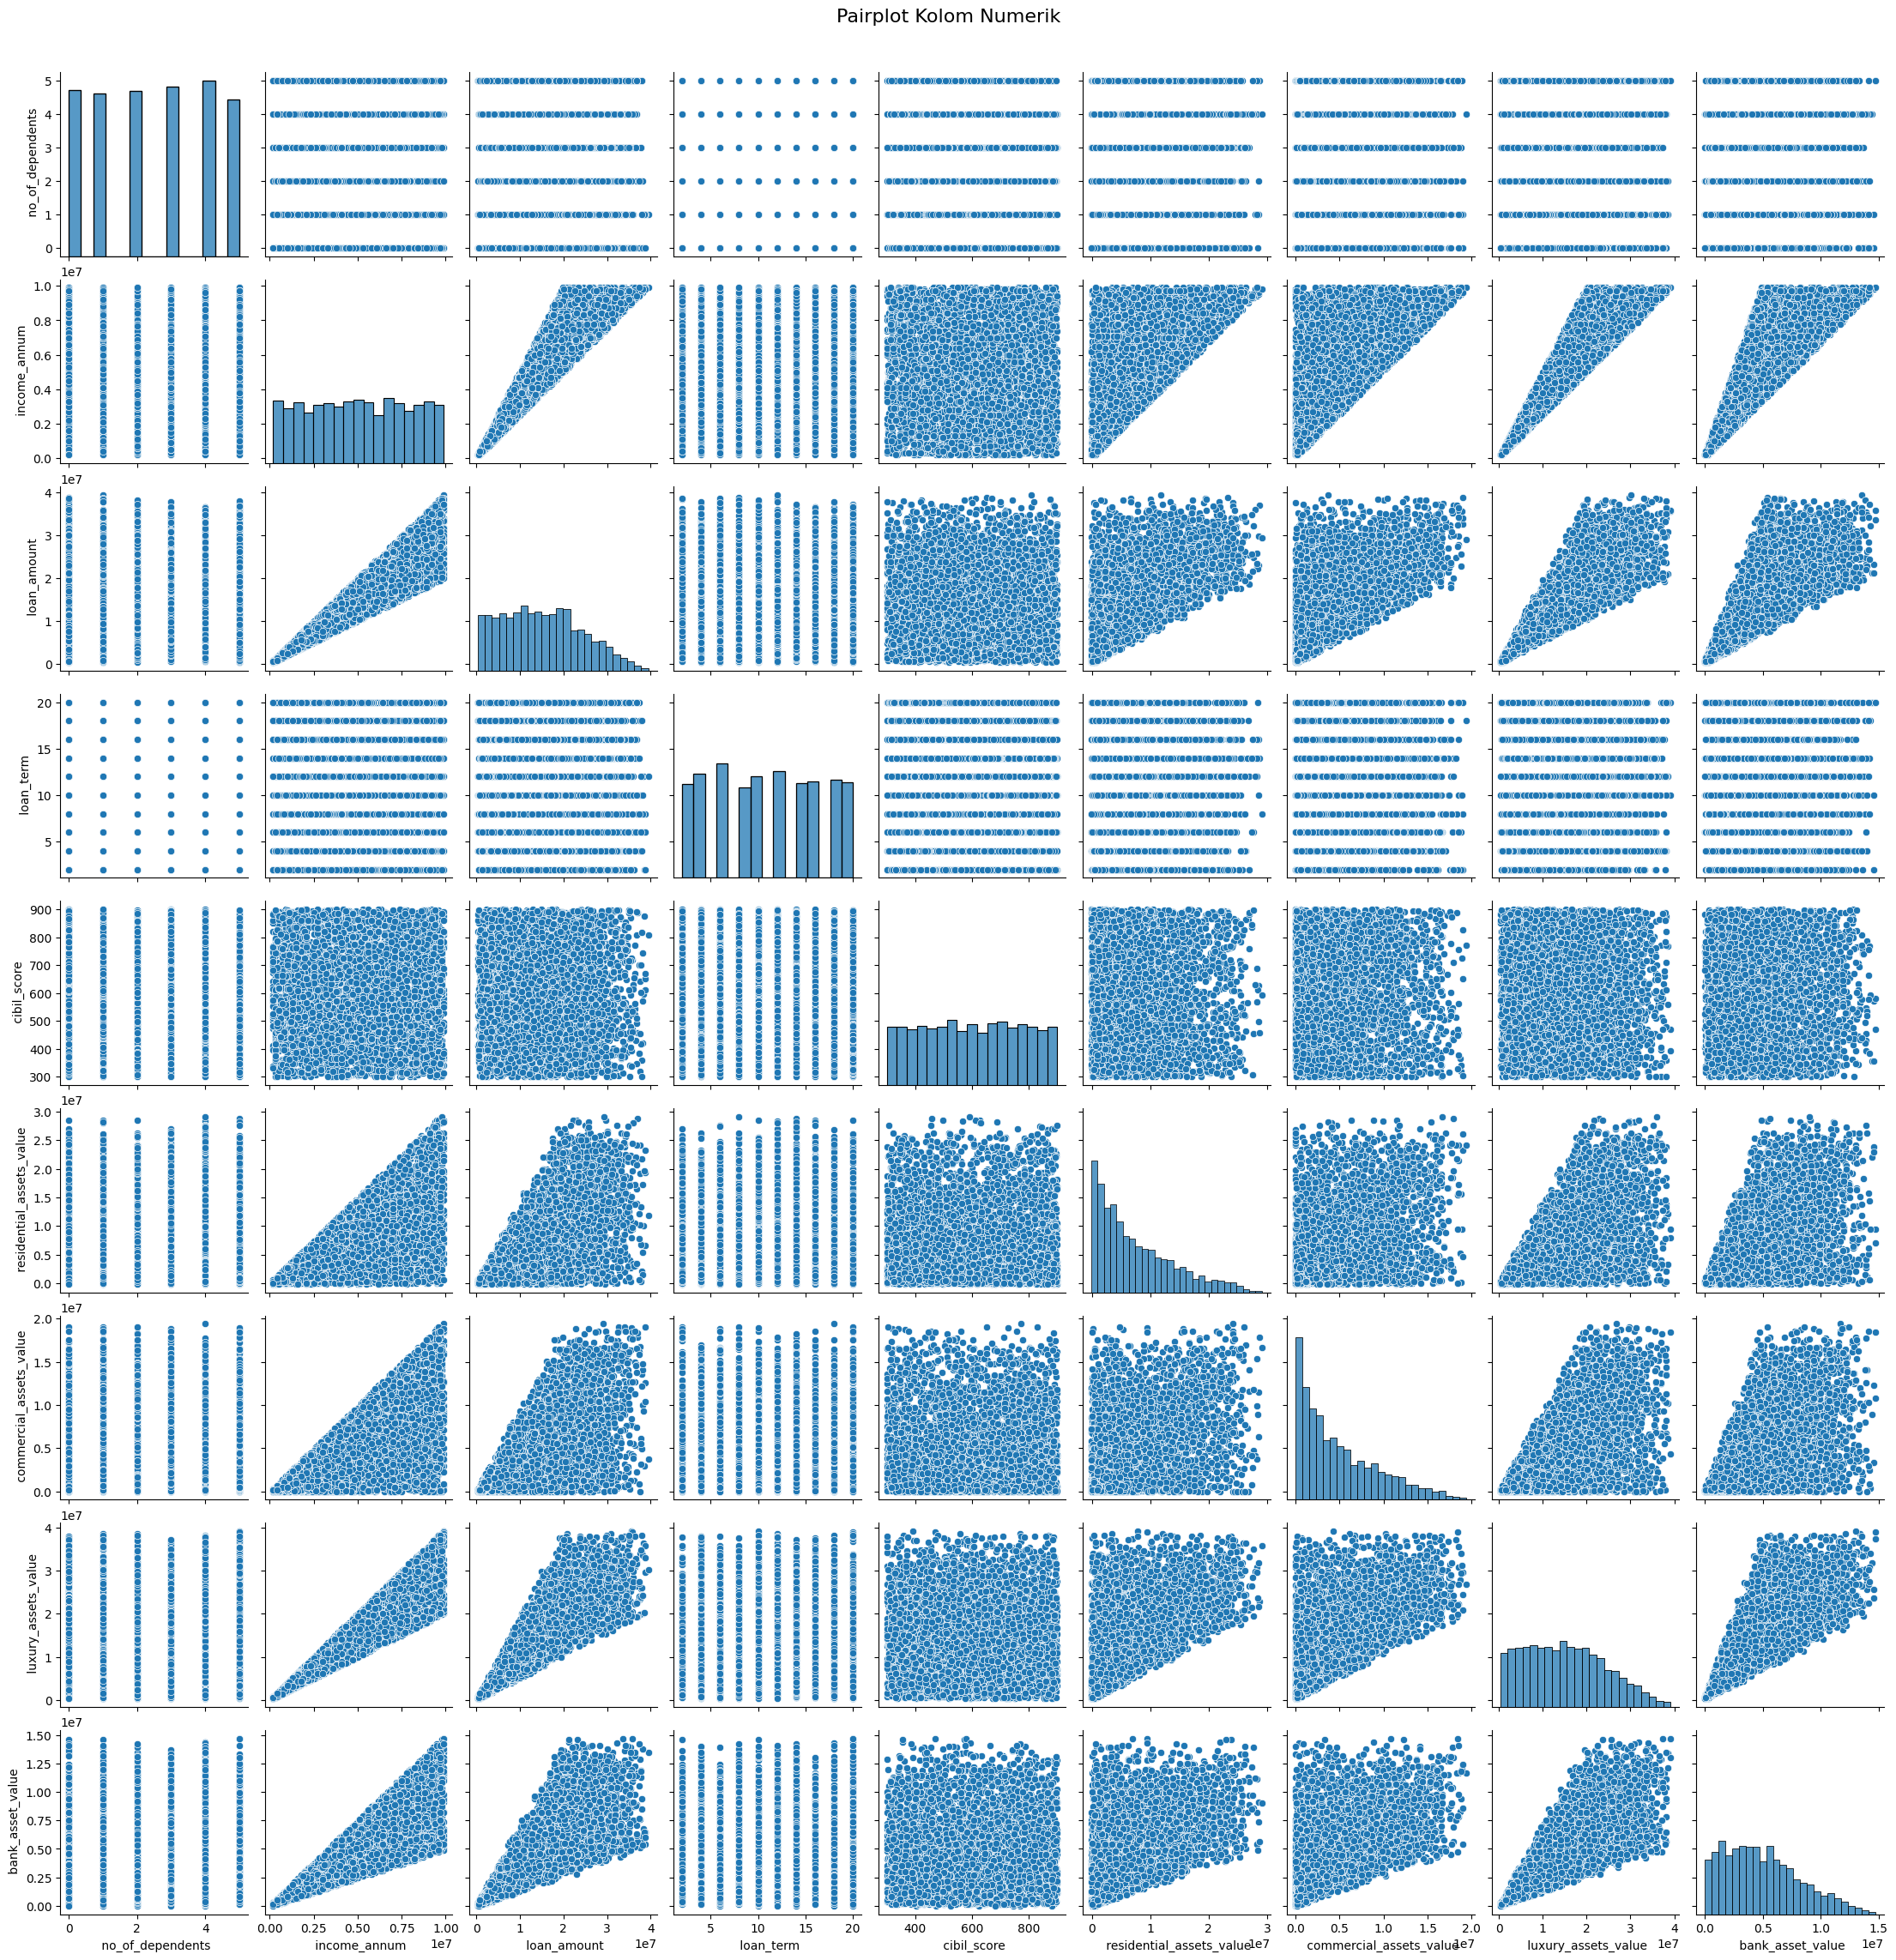

In [92]:
sns.pairplot(data)
plt.suptitle("Pairplot Kolom Numerik", fontsize=16, y=1.02)
plt.show()

In [112]:
df_corr

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,loan_status_numeric
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,NaN
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,NaN
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,NaN
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,NaN
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected,NaN
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved,NaN
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected,NaN
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved,NaN


In [113]:
df_corr = data.copy()
df_corr

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


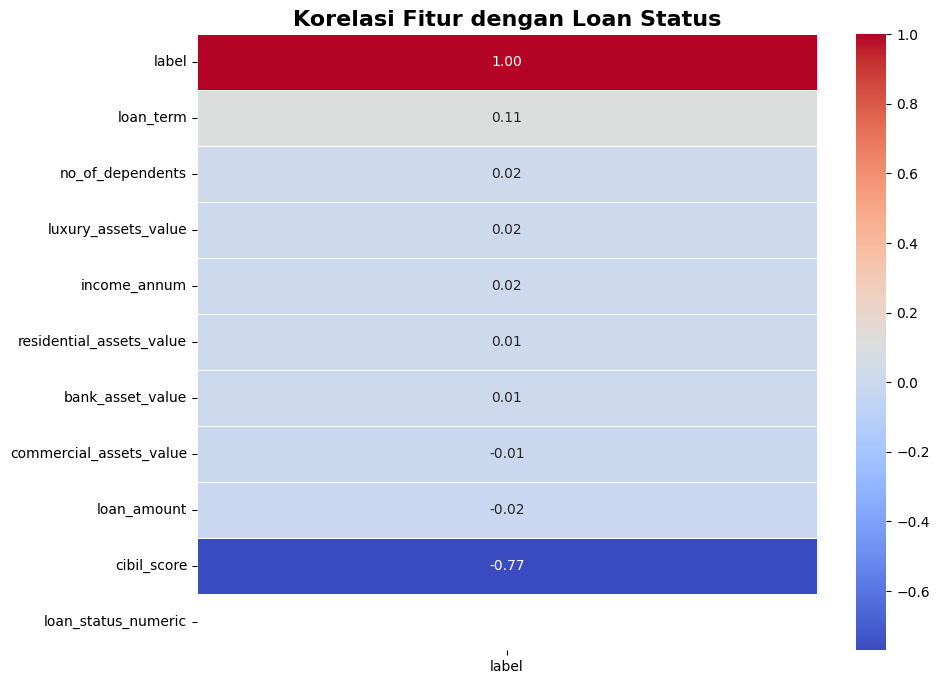

In [119]:
# Salin dataframe agar tidak mengubah aslinya
df_corr = data.copy()
df_corr['loan_status_numeric'] = df_corr['loan_status'].map({'Approved': 1, 'Rejected': 0})
df_corr['label'] = le.fit_transform(df_corr['loan_status'])

# Ambil hanya kolom numerik + target
corr = df_corr.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr[['label']].sort_values(by='label', ascending=False),
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Korelasi Fitur dengan Loan Status", fontsize=16, fontweight='bold')
plt.show()



In [153]:
df['no_of_dependents']

,no_of_dependents
0,2
1,0
2,3
3,3
4,5
...,...
4264,5
4265,0
4266,2
4267,1


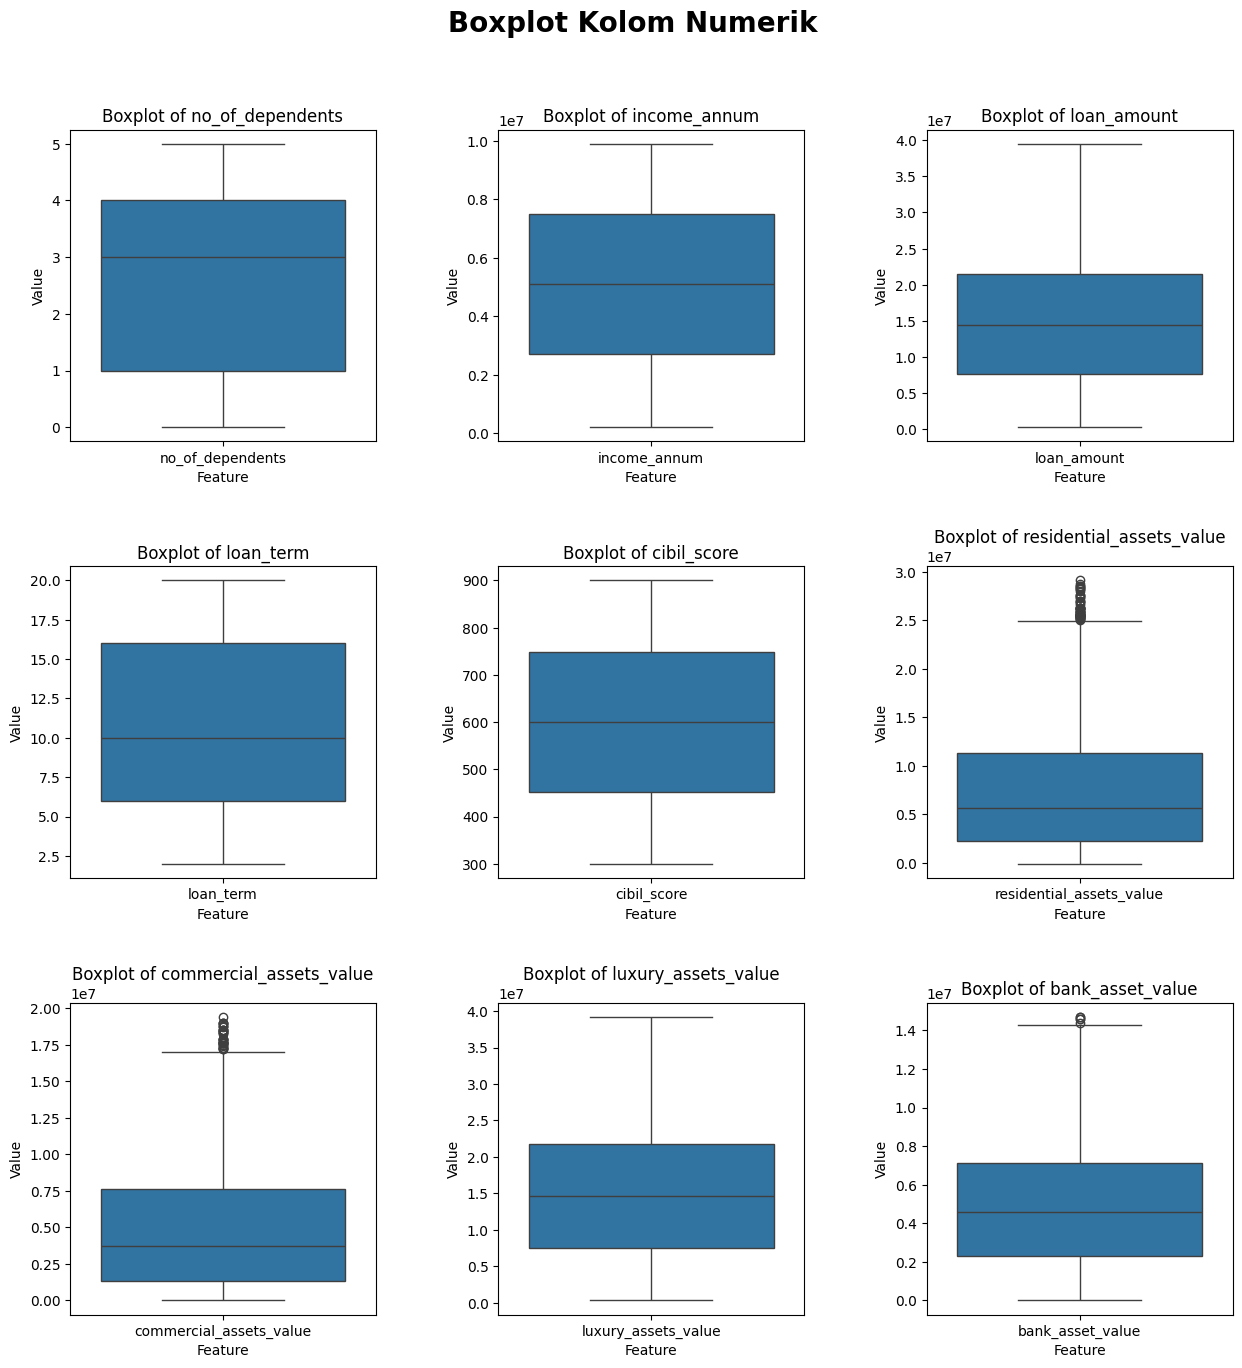

In [163]:
# Ambil kolom numerik
num_col = df.select_dtypes(include='int64').columns
df_long = df[num_col].melt(var_name='Feature', value_name='Value')

# Hitung jumlah subplot
n_cols = 3
n_rows = math.ceil(len(num_col) / n_cols)

# Buat figure dan axes
fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
axs = axs.flatten()

# Buat boxplot untuk setiap fitur numerik
for i, col in enumerate(num_col):
    sns.boxplot(data=df_long[df_long['Feature'] == col], x='Feature', y='Value', ax=axs[i])
    axs[i].set_title(f'Boxplot of {col}')
    # axs[i].tick_params(axis='x', rotation=45)

# Hapus axis kosong jika ada
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.suptitle("Boxplot Kolom Numerik", fontsize=20, fontweight='bold')
plt.subplots_adjust(wspace=0.4, hspace=0.4, top=0.9)
plt.show()


In [114]:
le = LabelEncoder()

In [117]:
df_corr['label'] = le.fit_transform(df_corr['loan_status'])
df_corr

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,label
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,0
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,1
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,1
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,1
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected,1
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved,0
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected,1
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved,0


In [123]:
df = df.drop(columns='loan_id')

In [125]:
cat_col = df.select_dtypes(include='object').columns

for kolom in cat_col:
  df[kolom] = le.fit_transform(df[kolom])
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,1
4265,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0
4266,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1
4267,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,0


In [126]:
y = df['loan_status']
X = df.drop(columns='loan_status', axis=1)

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MODELING

In [136]:
# Daftar model yang digunakan
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Decision Tree": DecisionTreeClassifier()
}

# Dictionary untuk menyimpan hasil evaluasi
results = []

# Evaluasi setiap model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })


In [137]:
# Ubah hasil ke dalam bentuk DataFrame
results_df = pd.DataFrame(results)

# Tampilkan hasil
results_df = results_df.sort_values(by='Accuracy', ascending=False)
results_df = results_df.reset_index(drop=True)
results_df


,Model,Accuracy,Precision,Recall,F1 Score
0,XGBoost,0.982436,0.980952,0.971698,0.976303
1,Random Forest,0.976581,0.977564,0.959119,0.968254
2,Decision Tree,0.974239,0.971338,0.959119,0.965190
3,Logistic Regression,0.729508,0.800000,0.364780,0.501080


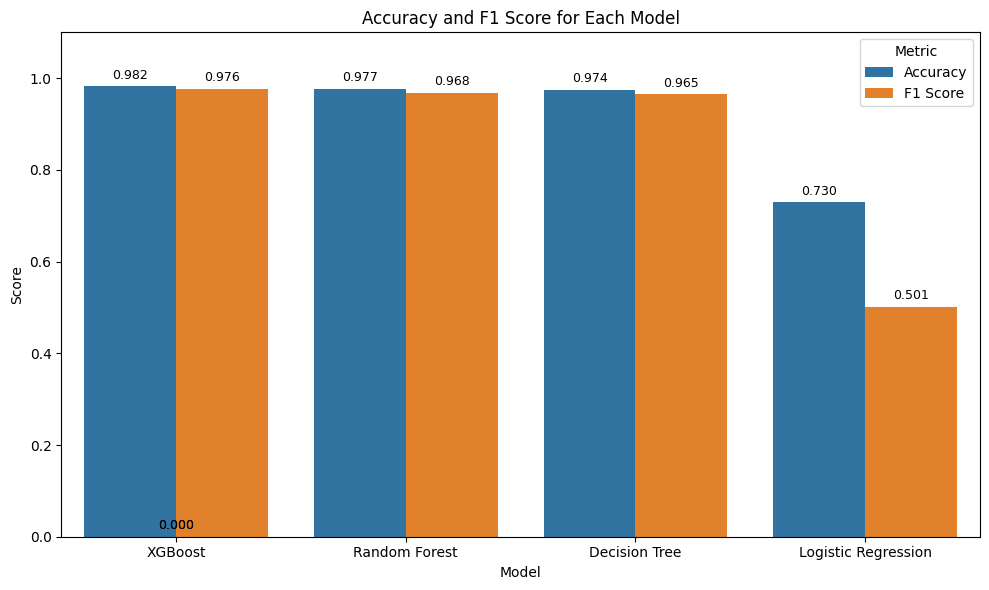

In [145]:
# Ubah dataframe ke format long agar bisa digunakan di seaborn barplot
results_long = results_df.melt(id_vars='Model', value_vars=['Accuracy', 'F1 Score'],
                               var_name='Metric', value_name='Score')

# Buat bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=results_long, x='Model', y='Score', hue='Metric')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2,
            height + 0.01,
            f'{height:.3f}',
            ha='center', va='bottom', fontsize=9)
# Tambahkan judul dan label
plt.title('Accuracy and F1 Score for Each Model')
plt.ylabel('Score')
plt.ylim(0, 1.1)  # Tambah batas atas agar label tidak terpotong
plt.legend(title='Metric')
plt.tight_layout()
plt.show()
